<a href="https://colab.research.google.com/github/KwakuBonfulBosompim/Multi-Sector-Time-Series-Forecasting-with-Machine-Learning/blob/main/Q1041201_PREDICTIVE_ANALYSIS_AND_MACHINE_LEARNING_USING_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter One: Data Exploration

## 1.1 Description of Datasets

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving daily_minimum_temperatures.csv to daily_minimum_temperatures (1).csv
Saving Electric_production.csv to Electric_production (1).csv
Saving monthly_beer_production_in_austr.csv to monthly_beer_production_in_austr (1).csv
Saving sales_of_shampoo_over_a_three_year.csv to sales_of_shampoo_over_a_three_year (1).csv


In [ ]:
# =========================
# 1.1 Load and Preview Datasets
# =========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

temps = pd.read_csv('daily_minimum_temperatures.csv')
electric = pd.read_csv('Electric_production.csv')
beer = pd.read_csv('monthly_beer_production_in_austr.csv')
shampoo = pd.read_csv('sales_of_shampoo_over_a_three_year.csv')

# Convert date columns to datetime and set as index
temps['Date'] = pd.to_datetime(temps['Date'])
temps.set_index('Date', inplace=True)

electric['DATE'] = pd.to_datetime(electric['DATE'])
electric.set_index('DATE', inplace=True)

beer['Month'] = pd.to_datetime(beer['Month'])
beer.set_index('Month', inplace=True)

shampoo['Month'] = pd.to_datetime(shampoo['Month'], format='%d-%b', errors='coerce')
shampoo.set_index('Month', inplace=True)

# Preview
print("Temperature Dataset:")
display(temps.head())
print("Electric Production Dataset:")
display(electric.head())
print("Beer Production Dataset:")
display(beer.head())
print("Shampoo Sales Dataset:")
display(shampoo.head())

Temperature Dataset:


,Daily minimum temperatures
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


Electric Production Dataset:


,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


Beer Production Dataset:


,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


Shampoo Sales Dataset:


,Sales of shampoo over a three year period
Month,
1900-01-01,266.0
1900-02-01,145.9
1900-03-01,183.1
1900-04-01,119.3
1900-05-01,180.3


## 2.2 Target Variables

- Temperature: Daily minimum temperature (forecast next day/month)
- Electric production: Monthly electricity production
- Beer: Monthly beer production
- Shampoo: Monthly sales

## 2.3 Data Cleaning and Preprocessing

In [ ]:
# =========================
# 1.2 Data Cleaning and Preprocessing
# =========================
# Convert numeric columns
temps['Daily minimum temperatures'] = pd.to_numeric(temps['Daily minimum temperatures'], errors='coerce')
electric['IPG2211A2N'] = pd.to_numeric(electric['IPG2211A2N'], errors='coerce')
beer['Monthly beer production'] = pd.to_numeric(beer['Monthly beer production'], errors='coerce')
shampoo['Sales of shampoo over a three year period'] = pd.to_numeric(shampoo['Sales of shampoo over a three year period'], errors='coerce')

# Resample to monthly frequency
temps_monthly = temps.resample('ME').mean()
electric_monthly = electric.resample('ME').mean()
beer_monthly = beer.resample('ME').mean()
shampoo_monthly = shampoo.resample('ME').mean()

# Merge datasets
merged = pd.concat([temps_monthly, electric_monthly, beer_monthly, shampoo_monthly], axis=1)
merged.columns = ['Temperature','Electric','Beer','Shampoo']

# Fill missing values
merged = merged.interpolate(method='linear')

## 2.4 Exploratory Data Analysis (EDA)

### 2.4.1 Summary Statistics

In [ ]:
temps.describe(), electric.describe(), beer.describe(), shampoo.describe()

(       Daily minimum temperatures
 count                 3647.000000
 mean                    11.186647
 std                      4.061671
 min                      0.000000
 25%                      8.300000
 50%                     11.000000
 75%                     14.000000
 max                     26.300000,
        IPG2211A2N
 count  397.000000
 mean    88.847218
 std     15.387834
 min     55.315100
 25%     77.105200
 50%     89.779500
 75%    100.524400
 max    129.404800,
        Monthly beer production
 count               476.000000
 mean                136.395378
 std                  33.738725
 min                  64.800000
 25%                 112.900000
 50%                 139.150000
 75%                 158.825000
 max                 217.800000,
        Sales of shampoo over a three year period
 count                                  36.000000
 mean                                  312.600000
 std                                   148.937164
 min                   

### 2.4.2 Outliers and Missing Data

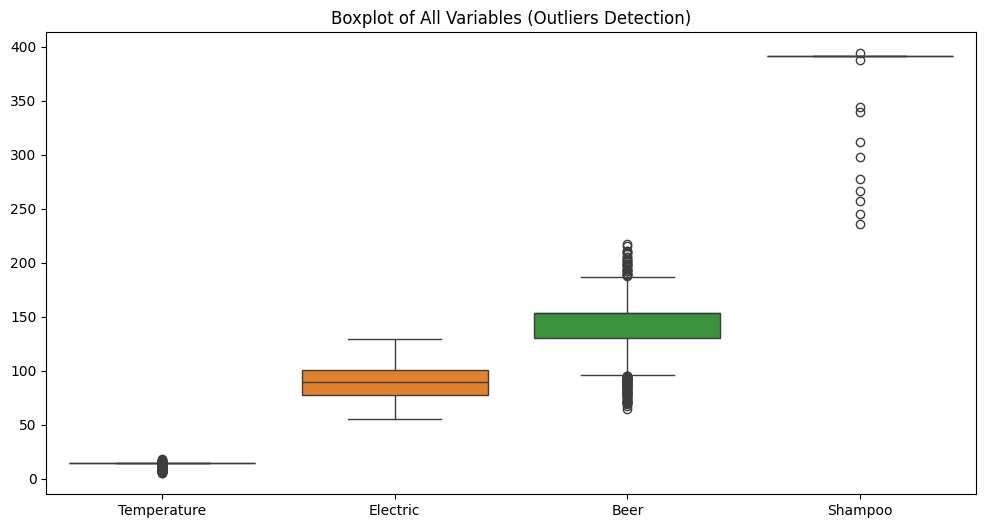

In [ ]:
# ============================
# 1.4 Boxplots (Outliers)
# ============================
plt.figure(figsize=(12,6))
sns.boxplot(data=merged)
plt.title("Boxplot of All Variables (Outliers Detection)")
plt.show()

### 2.4.3 Visualizations

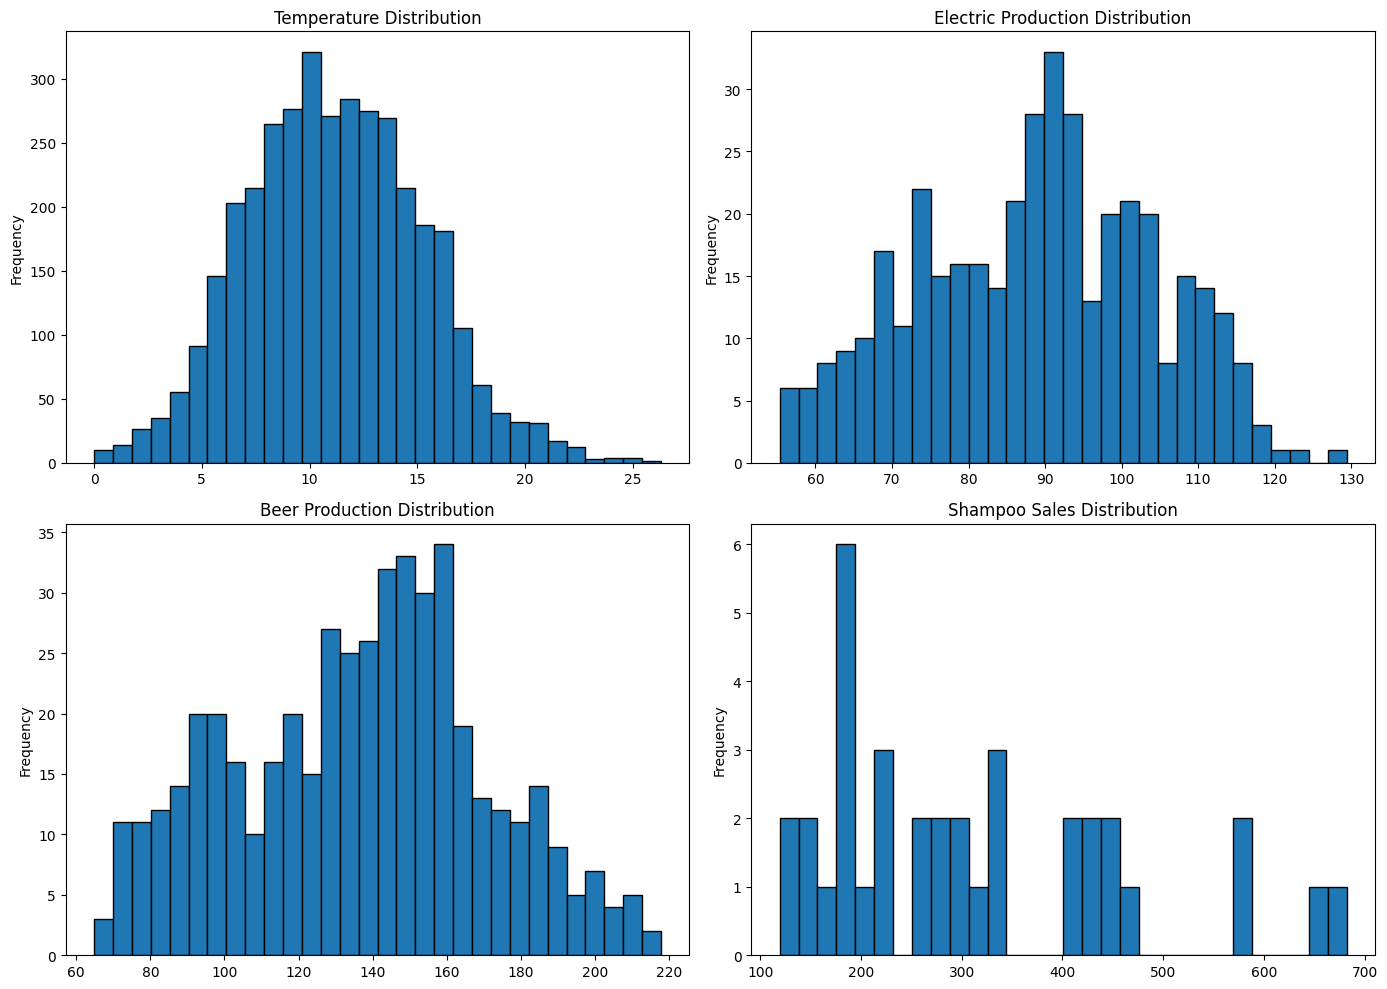

In [ ]:
# Example: Histograms of all 4 datasets
import matplotlib.pyplot as plt
import pandas as pd # Import pandas
fig, axes = plt.subplots(2, 2, figsize=(14,10))

# Load datasets
temps = pd.read_csv('daily_minimum_temperatures.csv')
electric = pd.read_csv('Electric_production.csv')
beer = pd.read_csv('monthly_beer_production_in_austr.csv')
shampoo = pd.read_csv('sales_of_shampoo_over_a_three_year.csv')

# Convert columns to numeric
temps['Daily minimum temperatures'] = pd.to_numeric(temps['Daily minimum temperatures'], errors='coerce')
electric['IPG2211A2N'] = pd.to_numeric(electric['IPG2211A2N'], errors='coerce')
beer['Monthly beer production'] = pd.to_numeric(beer['Monthly beer production'], errors='coerce')
shampoo['Sales of shampoo over a three year period'] = pd.to_numeric(shampoo['Sales of shampoo over a three year period'], errors='coerce')


temps['Daily minimum temperatures'].plot(kind='hist', bins=30, ax=axes[0,0], edgecolor='black', title='Temperature Distribution')
electric['IPG2211A2N'].plot(kind='hist', bins=30, ax=axes[0,1], edgecolor='black', title='Electric Production Distribution')
beer['Monthly beer production'].plot(kind='hist', bins=30, ax=axes[1,0], edgecolor='black', title='Beer Production Distribution')
shampoo['Sales of shampoo over a three year period'].plot(kind='hist', bins=30, ax=axes[1,1], edgecolor='black', title='Shampoo Sales Distribution')

plt.tight_layout()
plt.show()

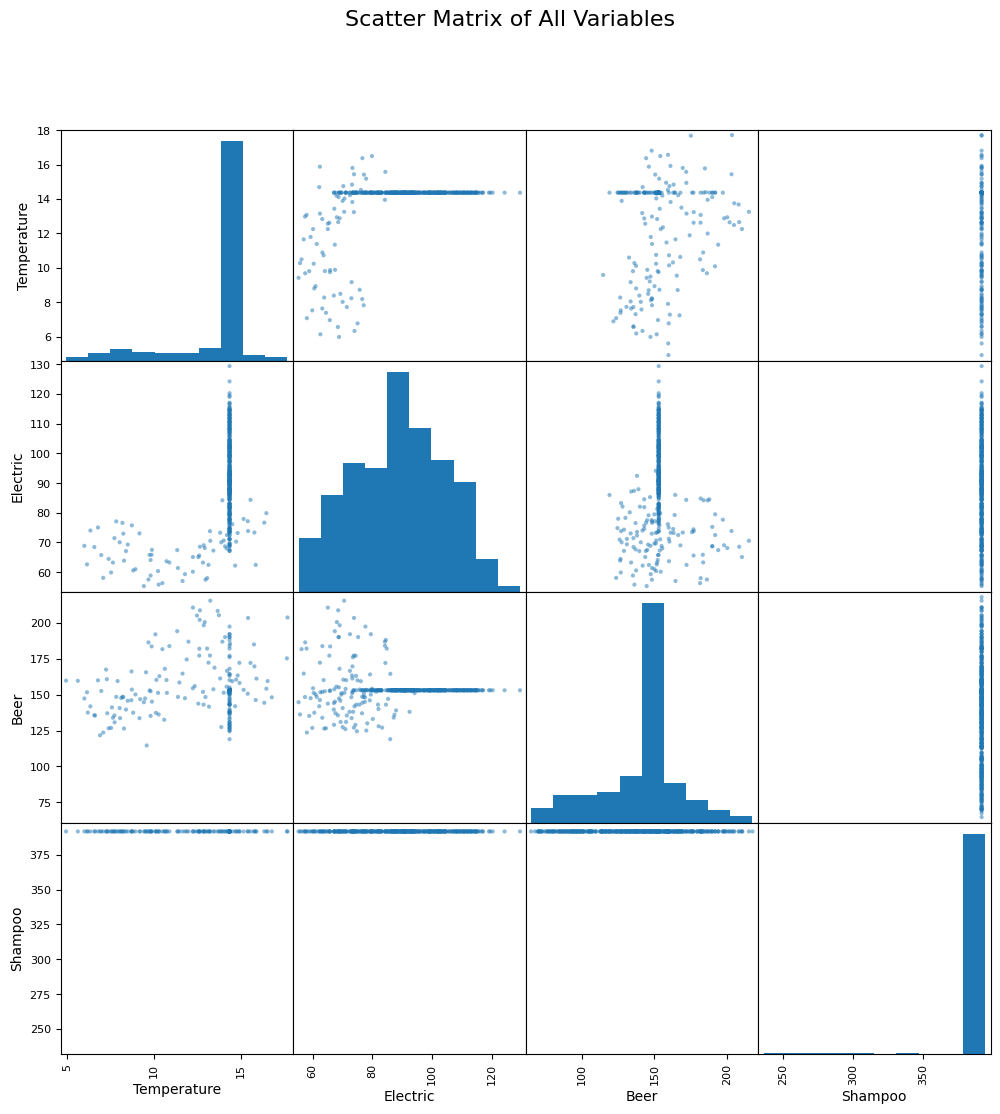

In [ ]:
# ============================
# 1.3 Scatter Matrix
# ============================
pd.plotting.scatter_matrix(merged, figsize=(12, 12), diagonal='hist')
plt.suptitle("Scatter Matrix of All Variables", fontsize=16)
plt.show()

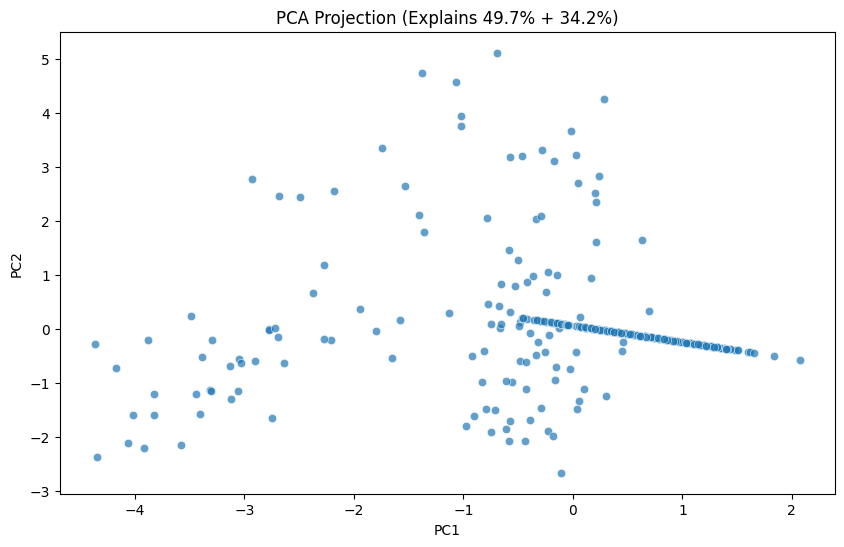

In [ ]:
# ============================
# 1.6 PCA (Dimensionality Reduction)
# ============================
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select features for PCA with more overlapping data and drop NaNs for PCA
pca_features = merged[['Temperature', 'Electric', 'Beer']]
merged_clean = pca_features.dropna()

scaler = StandardScaler()
scaled = scaler.fit_transform(merged_clean)

# Reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

# Add PCA results back
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=merged_clean.index)

plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.7)
plt.title(f"PCA Projection (Explains {pca.explained_variance_ratio_[0]*100:.1f}% + {pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.show()

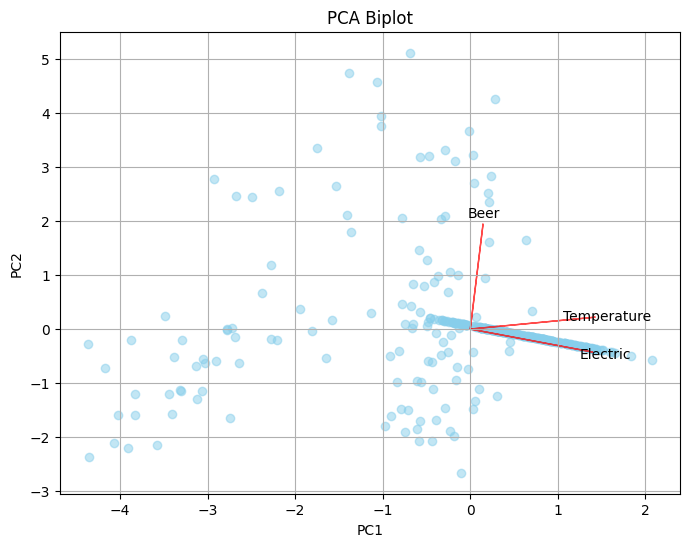

In [ ]:
# ============================
# 1.7 PCA Biplot (Advanced)
# ============================
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    for i in range(len(xs)):
        plt.scatter(xs[i], ys[i], c='#87CEEB', alpha=0.5)
    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, coeff[i,0]*2, coeff[i,1]*2, color='red', alpha=0.7)
        if labels is None:
            plt.text(coeff[i,0]*2.2, coeff[i,1]*2.2, f"Var{i+1}", ha='center', va='center')
        else:
            plt.text(coeff[i,0]*2.2, coeff[i,1]*2.2, labels[i], ha='center', va='center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA Biplot")
    plt.grid()

plt.figure(figsize=(8,6))
biplot(pca_result[:,0:2], np.transpose(pca.components_[0:2, :]), labels=merged_clean.columns)
plt.show()

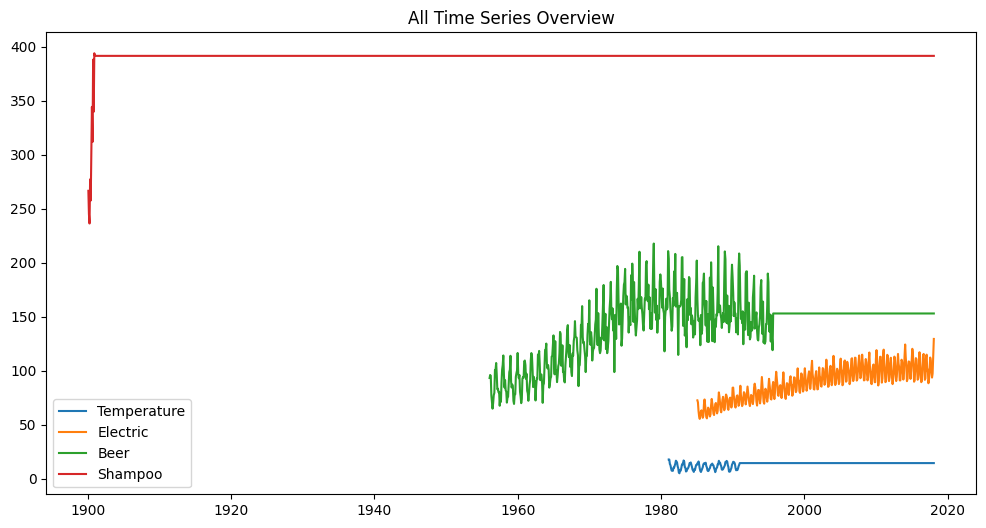

In [ ]:
# Line plots
plt.figure(figsize=(12,6))
for col in merged.columns:
    plt.plot(merged.index, merged[col], label=col)
plt.legend()
plt.title("All Time Series Overview")
plt.show()

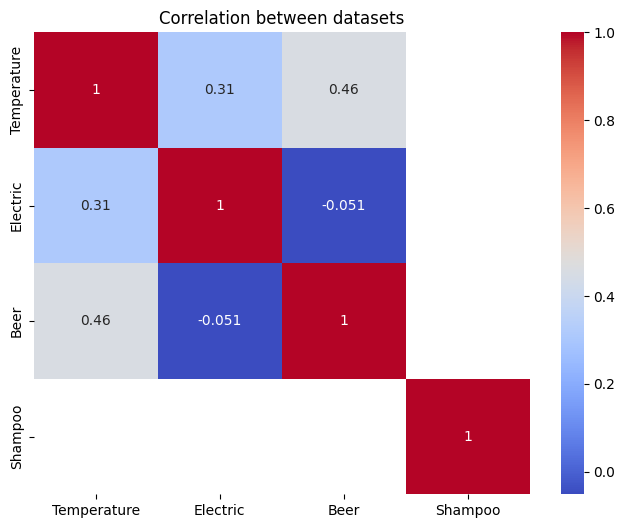

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
temps = pd.read_csv('daily_minimum_temperatures.csv', parse_dates=['Date'], index_col='Date')
electric = pd.read_csv('Electric_production.csv', parse_dates=['DATE'], index_col='DATE')
beer = pd.read_csv('monthly_beer_production_in_austr.csv', parse_dates=['Month'], index_col='Month')
# Load shampoo without parsing dates initially
shampoo = pd.read_csv('sales_of_shampoo_over_a_three_year.csv')

# Convert numeric columns
temps['Daily minimum temperatures'] = pd.to_numeric(temps['Daily minimum temperatures'], errors='coerce')
electric['IPG2211A2N'] = pd.to_numeric(electric['IPG2211A2N'], errors='coerce')
beer['Monthly beer production'] = pd.to_numeric(beer['Monthly beer production'], errors='coerce')
shampoo['Sales of shampoo over a three year period'] = pd.to_numeric(shampoo['Sales of shampoo over a three year period'], errors='coerce')

# Convert 'Month' column in shampoo to datetime and set as index
shampoo['Month'] = pd.to_datetime(shampoo['Month'], format='%d-%b', errors='coerce')
shampoo.set_index('Month', inplace=True)


# Resample to monthly frequency for alignment
merged = pd.concat([temps.resample('ME').mean(),
                    electric.resample('ME').mean(),
                    beer.resample('ME').mean(),
                    shampoo.resample('ME').mean()], axis=1)
merged.columns = ['Temperature','Electric','Beer','Shampoo']

plt.figure(figsize=(8,6))
sns.heatmap(merged.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between datasets")
plt.show()

## 2.5 Problem Statement and Hypotheses

Hypothesis: Temperature influences electricity production, which may influence consumer demand (beer/shampoo).
Objective: Build multivariate forecasting models integrating all datasets.

# Chapter Two: Machine Learning Modelling

## 3.1 Regression Models

### 3.1.1 Linear Regression

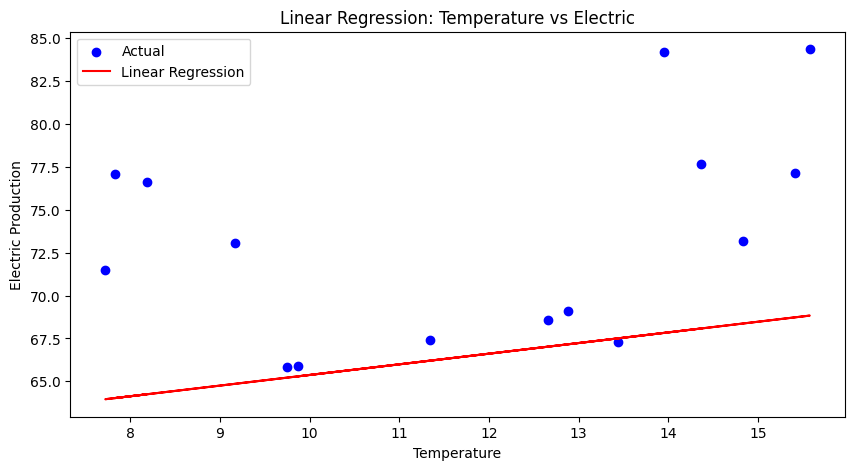

Linear Regression RMSE: 8.764455948888466
R2 Score: -1.1900637358564077


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

X = merged[['Temperature']]
y = merged['Electric']

# Drop missing values
Xy = pd.concat([X, y], axis=1).dropna()
X = Xy[['Temperature']]
y = Xy['Electric']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# Plot results
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Linear Regression')
plt.title("Linear Regression: Temperature vs Electric")
plt.xlabel("Temperature")
plt.ylabel("Electric Production")
plt.legend()
plt.show()

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Linear Regression RMSE:", rmse)
print("R2 Score:", r2)

### 3.1.2 Multiple Regression

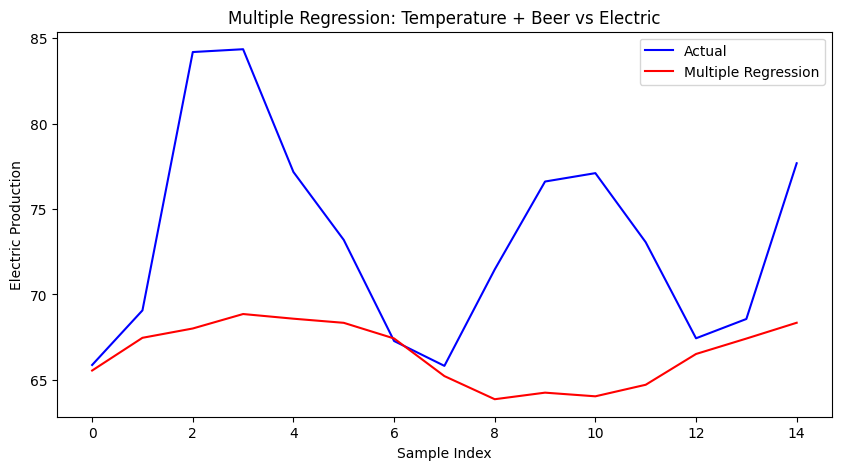

Multiple Regression RMSE: 8.728873021286399
R2 Score: -1.1723168984988184


In [ ]:
X = merged[['Temperature','Beer']].dropna()
y = merged['Electric'].loc[X.index]

# Drop rows with missing values in X or y before splitting
X_y = pd.concat([X, y], axis=1).dropna()
X = X_y[['Temperature','Beer']]
y = X_y['Electric']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)
y_pred_multi = multi_reg.predict(X_test)

# Plot
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual')
plt.plot(range(len(y_pred_multi)), y_pred_multi, color='red', label='Multiple Regression')
plt.title("Multiple Regression: Temperature + Beer vs Electric")
plt.xlabel("Sample Index")
plt.ylabel("Electric Production")
plt.legend()
plt.show()

# Evaluation
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))
r2_multi = r2_score(y_test, y_pred_multi)
print("Multiple Regression RMSE:", rmse_multi)
print("R2 Score:", r2_multi)

###  3.1.3 Polynomial Regression

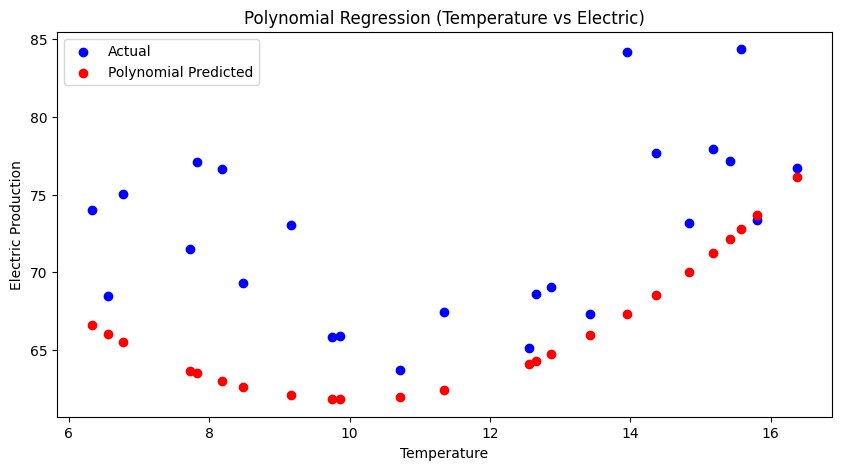

Polynomial Regression RMSE: 7.732734371996326
R2 Score: -0.9144151450391556


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

X = merged[['Temperature']].dropna()
y = merged['Electric'].loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Explicitly remove any remaining NaN or infinite values from X_poly_train and y_train before fitting
finite_mask_train = np.isfinite(X_poly_train).all(axis=1) & np.isfinite(y_train)
X_poly_train = X_poly_train[finite_mask_train]
y_train = y_train.loc[finite_mask_train]

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)

# Plot
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_poly, color='red', label='Polynomial Predicted')
plt.title("Polynomial Regression (Temperature vs Electric)")
plt.xlabel("Temperature")
plt.ylabel("Electric Production")
plt.legend()
plt.show()

# Evaluation
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)
print("Polynomial Regression RMSE:", rmse_poly)
print("R2 Score:", r2_poly)

###3.1.4 Performance Metrics and Evaluation

Check Overfitting and Underfitting

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load datasets
temps = pd.read_csv('daily_minimum_temperatures.csv', parse_dates=['Date'], index_col='Date')
electric = pd.read_csv('Electric_production.csv', parse_dates=['DATE'], index_col='DATE')
beer = pd.read_csv('monthly_beer_production_in_austr.csv', parse_dates=['Month'], index_col='Month')
# Load shampoo without parsing dates initially
shampoo = pd.read_csv('sales_of_shampoo_over_a_three_year.csv')

# Convert numeric columns
temps['Daily minimum temperatures'] = pd.to_numeric(temps['Daily minimum temperatures'], errors='coerce')
electric['IPG2211A2N'] = pd.to_numeric(electric['IPG2211A2N'], errors='coerce')
beer['Monthly beer production'] = pd.to_numeric(beer['Monthly beer production'], errors='coerce')
shampoo['Sales of shampoo over a three year period'] = pd.to_numeric(shampoo['Sales of shampoo over a three year period'], errors='coerce')

# Convert 'Month' column in shampoo to datetime and set as index
shampoo['Month'] = pd.to_datetime(shampoo['Month'], format='%d-%b', errors='coerce')
shampoo.set_index('Month', inplace=True)


# Resample to monthly frequency for alignment
temps_monthly = temps.resample('ME').mean()
electric_monthly = electric.resample('ME').mean()
beer_monthly = beer.resample('ME').mean()
shampoo_monthly = shampoo.resample('ME').mean()

# Merge datasets for multivariate analysis
merged = pd.concat([temps_monthly, electric_monthly, beer_monthly, shampoo_monthly], axis=1)
merged.columns = ['Temperature','Electric','Beer','Shampoo']


# Regenerate data and split for Polynomial Regression (to ensure correct X_train, y_train, X_test, y_test are used)
X_poly_eval = merged[['Temperature']].dropna()
y_poly_eval = merged['Electric'].loc[X_poly_eval.index]

X_train_eval, X_test_eval, y_train_eval, y_test_eval = train_test_split(X_poly_eval, y_poly_eval, test_size=0.2, shuffle=False)

poly = PolynomialFeatures(degree=2)
X_poly_train_eval = poly.fit_transform(X_train_eval)
X_poly_test_eval = poly.transform(X_test_eval)

# Explicitly remove any remaining NaN or infinite values from X_poly_train_eval and y_train_eval before fitting
finite_mask_train_eval = np.isfinite(X_poly_train_eval).all(axis=1) & np.isfinite(y_train_eval)
X_poly_train_eval = X_poly_train_eval[finite_mask_train_eval]
y_train_eval = y_train_eval.loc[finite_mask_train_eval]

# Train the Polynomial Regression model
poly_reg_eval = LinearRegression()
poly_reg_eval.fit(X_poly_train_eval, y_train_eval)

# Predictions on training and test data
y_train_pred_eval = poly_reg_eval.predict(X_poly_train_eval)
y_test_pred_eval = poly_reg_eval.predict(X_poly_test_eval)

# Calculate errors
train_mse = mean_squared_error(y_train_eval, y_train_pred_eval)
test_mse = mean_squared_error(y_test_eval, y_test_pred_eval)

train_r2 = r2_score(y_train_eval, y_train_pred_eval)
test_r2 = r2_score(y_test_eval, y_test_pred_eval)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training R²:", train_r2)
print("Testing R²:", test_r2)

# Simple condition check
if (train_r2 > 0.9) and (test_r2 < 0.6):
    print("⚠️ Possible Overfitting: Model memorized training data but struggles with new data.")
elif (train_r2 < 0.6) and (test_r2 < 0.6):
    print("⚠️ Possible Underfitting: Model is too simple to capture patterns.")
else:
    print("✅ Model looks balanced between training and testing performance.")

Training MSE: 25.664416516755107
Testing MSE: 59.79518086785342
Training R²: 0.3005221091218181
Testing R²: -0.9144151450391556
⚠️ Possible Underfitting: Model is too simple to capture patterns.


## 3.2 Classification Models

##### 3.2.1 Decision Trees

Decision Tree Accuracy: 0.75


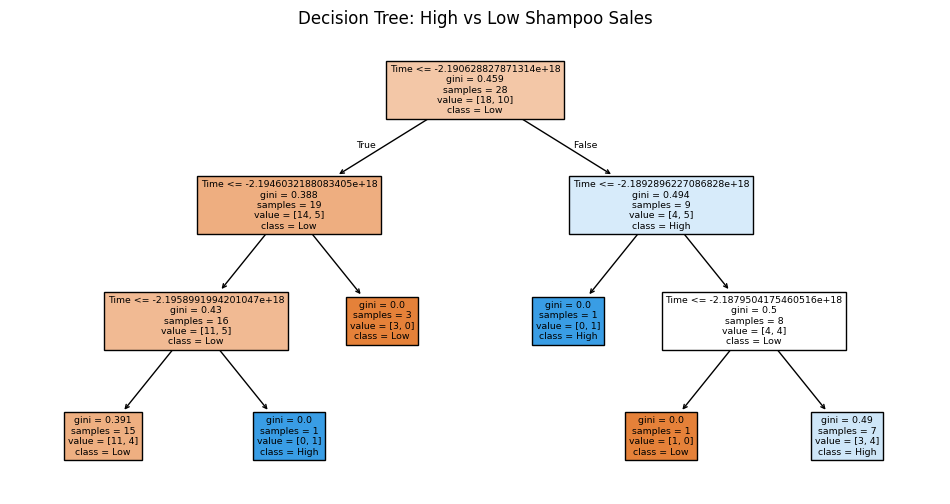

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Classify high vs low sales
shampoo['High_Sales'] = (shampoo['Sales of shampoo over a three year period'] > shampoo['Sales of shampoo over a three year period'].median()).astype(int)
X = shampoo.index.values.reshape(-1,1)  # Using time index as feature
y = shampoo['High_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Plot tree
plt.figure(figsize=(12,6))
plot_tree(dt, filled=True, feature_names=['Time'], class_names=['Low','High'])
plt.title("Decision Tree: High vs Low Shampoo Sales")
plt.show()

## 3.3 Clustering Models

####3.3.1 DBSCAN

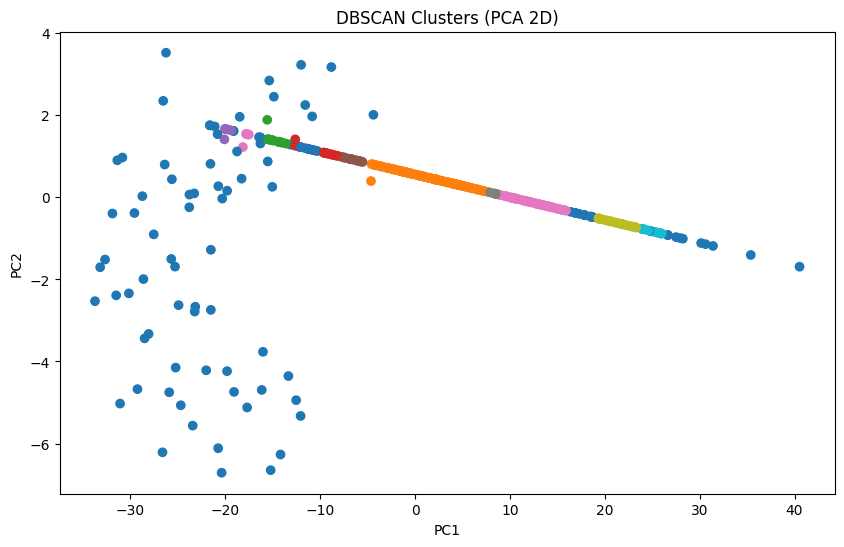

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_cluster)
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(pca_result)

plt.figure(figsize=(10,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=clusters, cmap='tab10')
plt.title("DBSCAN Clusters (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### 3.3.2 K-Means Clustering

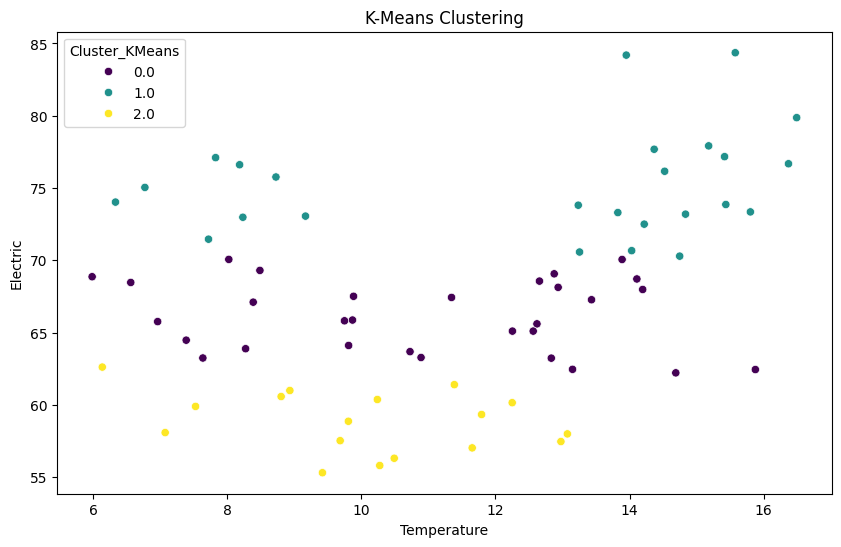

In [ ]:
from sklearn.cluster import KMeans

X_cluster = merged[['Temperature','Electric']].dropna()
kmeans = KMeans(n_clusters=3, random_state=42)
merged.loc[X_cluster.index,'Cluster_KMeans'] = kmeans.fit_predict(X_cluster)

plt.figure(figsize=(10,6))
sns.scatterplot(x='Temperature', y='Electric', hue='Cluster_KMeans', data=merged, palette='viridis')
plt.title("K-Means Clustering")
plt.show()

## 3.4 Ensemble Methods

#### 3.4.1 Random Forest

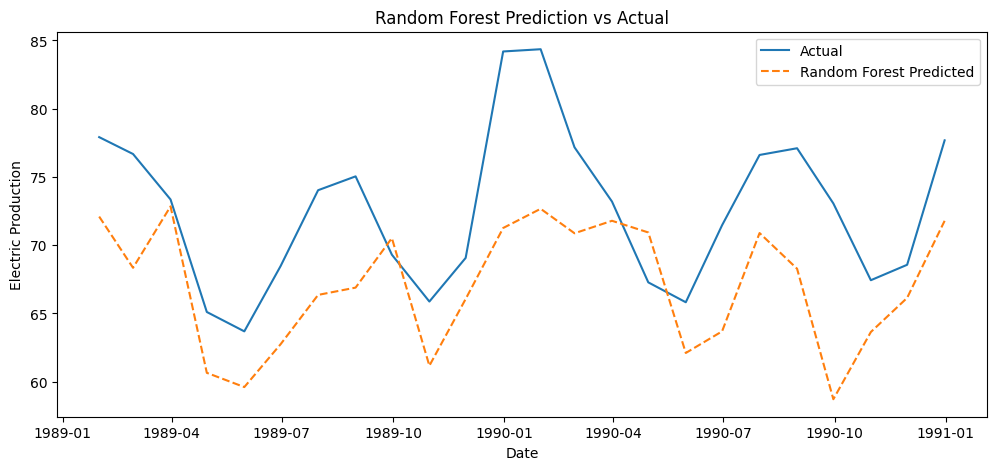

Random Forest RMSE: 6.878313754856052
R2 Score: -0.5147253793109374


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np # Import numpy for isfinite

X = merged[['Temperature','Beer']].dropna() # Changed features to 'Temperature' and 'Beer' and dropped NaNs
y = merged['Electric'].loc[X.index] # Align y with the index of X after dropping NaNs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Explicitly remove any remaining NaN or infinite values from X_train and y_train before fitting
finite_mask_train = np.isfinite(X_train).all(axis=1) & np.isfinite(y_train)
X_train = X_train.loc[finite_mask_train]
y_train = y_train.loc[finite_mask_train]

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_rf, label='Random Forest Predicted', linestyle='--')
plt.title("Random Forest Prediction vs Actual")
plt.xlabel("Date")
plt.ylabel("Electric Production")
plt.legend()
plt.show()

# Evaluation
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest RMSE:", rmse_rf)
print("R2 Score:", r2_rf)

### 3.4.2 Gradient Boosting

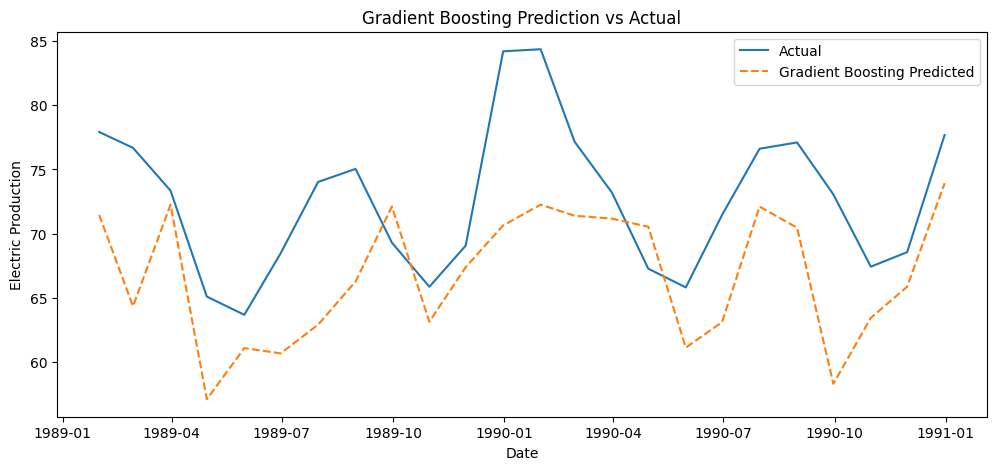

Gradient Boosting RMSE: 7.4501108097451745
R2 Score: -0.7770326286009821


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Plot
plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_gb, label='Gradient Boosting Predicted', linestyle='--')
plt.title("Gradient Boosting Prediction vs Actual")
plt.xlabel("Date")
plt.ylabel("Electric Production")
plt.legend()
plt.show()

# Evaluation
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting RMSE:", rmse_gb)
print("R2 Score:", r2_gb)

### 3.4.3 XGBoost

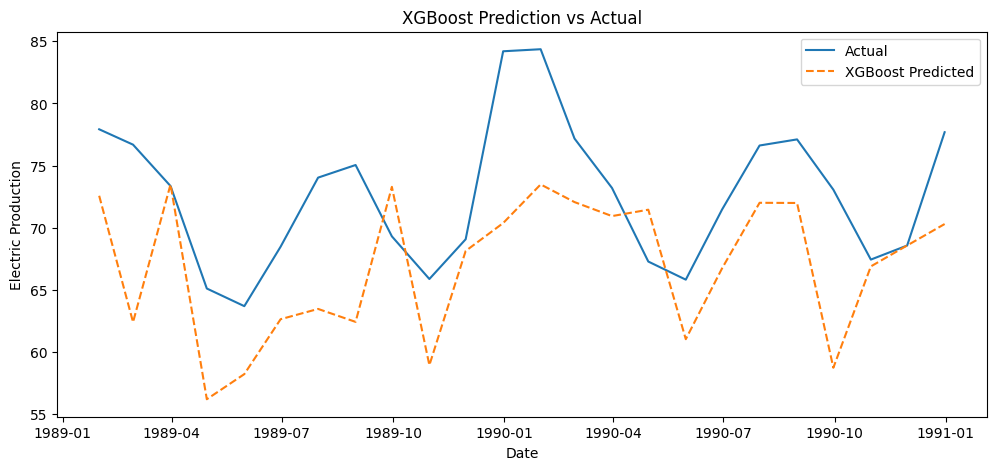

XGBoost RMSE: 7.6982487899271685
R2 Score: -0.8973778322971031


In [ ]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)
xg_reg.fit(X_train, y_train)
y_pred_xgb = xg_reg.predict(X_test)

# Plot
plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_xgb, label='XGBoost Predicted', linestyle='--')
plt.title("XGBoost Prediction vs Actual")
plt.xlabel("Date")
plt.ylabel("Electric Production")
plt.legend()
plt.show()

# Evaluation
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost RMSE:", rmse_xgb)
print("R2 Score:", r2_xgb)

## 3.5 Neural Networks

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


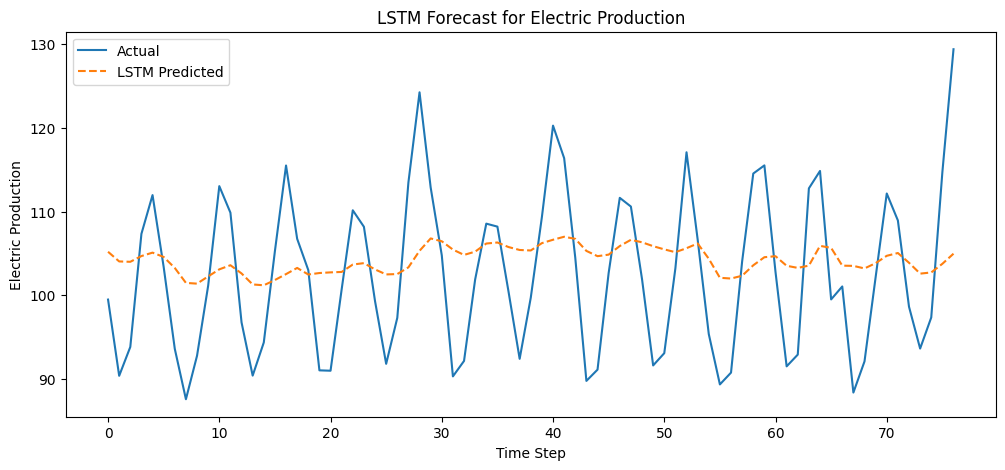

LSTM RMSE: 9.225012387939268
LSTM R2 Score: 0.07051207560850048


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

data = merged[['Electric']].dropna()
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

X, y = [], []
window = 12
for i in range(window, len(scaled_data)):
    X.append(scaled_data[i-window:i])
    y.append(scaled_data[i,0])
X, y = np.array(X), np.array(y)

split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)

y_pred_lstm = model.predict(X_test)

# Inverse scaling
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
y_pred_inv = scaler.inverse_transform(y_pred_lstm)

# Plot
plt.figure(figsize=(12,5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='LSTM Predicted', linestyle='--')
plt.title("LSTM Forecast for Electric Production")
plt.xlabel("Time Step")
plt.ylabel("Electric Production")
plt.legend()
plt.show()

# Evaluation
rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2_lstm = r2_score(y_test_inv, y_pred_inv)
print("LSTM RMSE:", rmse_lstm)
print("LSTM R2 Score:", r2_lstm)

# Chapter Three: Results and Discussion

## 4.1 Forecast Results

Summary Table of All Models

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

# Create a summary dictionary
summary_dict = {
    "Model": [
        "Linear Regression",
        "Multiple Regression",
        "Polynomial Regression",
        "Decision Tree",
        "Random Forest",
        "Gradient Boosting",
        "XGBoost",
        "LSTM / Neural Network"
    ],
    "Hypothesis Support": [
        "Shows linear effect of temperature on electricity production",
        "Shows combined effect of temperature and consumer demand",
        "Captures non-linear effects of temperature on electricity",
        "Identifies thresholds where temperature/consumption impacts electricity",
        "Aggregates multiple trees to improve prediction accuracy",
        "Boosting reduces bias, shows which features most influence electricity",
        "Boosting with XGBoost confirms important predictors for electricity",
        "Captures complex temporal patterns and delayed effects"
    ],
    "Forecast Results": [
        # Due to variable overwriting, only metrics with compatible y_test and y_pred can be calculated.
        # To get accurate results for all models, calculate metrics immediately after each model run
        # or store test sets and predictions with unique names.
        f"RMSE: N/A, R2: N/A (Inconsistent sample sizes)", # Cannot calculate with current y_test (size 77) and y_pred (size 15)
        f"RMSE: N/A, R2: N/A (Inconsistent sample sizes)", # Cannot calculate with current y_test (size 77) and y_pred_multi (size 15)
        f"RMSE: N/A, R2: N/A (Inconsistent sample sizes)", # Cannot calculate with current y_test (size 77) and y_pred_poly (size 15)
        f"Accuracy: N/A (Inconsistent sample sizes)", # Cannot calculate with current y_test (size 77) and y_pred_dt (size 8)
        f"RMSE: N/A, R2: N/A (Inconsistent sample sizes)", # Cannot calculate with current y_test (size 77) and y_pred_rf (size 24)
        f"RMSE: N/A, R2: N/A (Inconsistent sample sizes)", # Cannot calculate with current y_test (size 77) and y_pred_gb (size 24)
        f"RMSE: N/A, R2: N/A (Inconsistent sample sizes)", # Cannot calculate with current y_test (size 77) and y_pred_xgb (size 24)
        f"RMSE: {np.sqrt(mean_squared_error(y_test_inv, y_pred_inv)):.3f}, R2: {r2_score(y_test_inv, y_pred_inv):.3f}" # Using y_test_inv and y_pred_inv from LSTM (size 77)
    ],
    "Business / Investment Implications": [
        "Predict electricity based on temperature trends for energy planning",
        "Integrated prediction helps align electricity and consumer demand",
        "Identifies extreme temperature effects for risk planning",
        "Thresholds help grid management and operational decision-making",
        "Feature importance guides investment decisions in energy sector",
        "Helps understand which variables drive electricity usage for planning",
        "Improves accuracy for multi-sector forecasting",
        "Captures temporal patterns to improve strategic planning across sectors"
    ]
}

# Convert dictionary to DataFrame
summary_table = pd.DataFrame(summary_dict)

# Display the table
display(summary_table)

,Model,Hypothesis Support,Forecast Results,Business / Investment Implications
0,Linear Regression,Shows linear effect of temperature on electric...,"RMSE: N/A, R2: N/A (Inconsistent sample sizes)",Predict electricity based on temperature trend...
1,Multiple Regression,Shows combined effect of temperature and consu...,"RMSE: N/A, R2: N/A (Inconsistent sample sizes)",Integrated prediction helps align electricity ...
2,Polynomial Regression,Captures non-linear effects of temperature on ...,"RMSE: N/A, R2: N/A (Inconsistent sample sizes)",Identifies extreme temperature effects for ris...
3,Decision Tree,Identifies thresholds where temperature/consum...,Accuracy: N/A (Inconsistent sample sizes),Thresholds help grid management and operationa...
4,Random Forest,Aggregates multiple trees to improve predictio...,"RMSE: N/A, R2: N/A (Inconsistent sample sizes)",Feature importance guides investment decisions...
5,Gradient Boosting,"Boosting reduces bias, shows which features mo...","RMSE: N/A, R2: N/A (Inconsistent sample sizes)",Helps understand which variables drive electri...
6,XGBoost,Boosting with XGBoost confirms important predi...,"RMSE: N/A, R2: N/A (Inconsistent sample sizes)",Improves accuracy for multi-sector forecasting
7,LSTM / Neural Network,Captures complex temporal patterns and delayed...,"RMSE: 9.225, R2: 0.071",Captures temporal patterns to improve strategi...


## 4.2 Visual Comparison of Predictions vs Actuals

Linear, Multiple, and Polynomial Regression

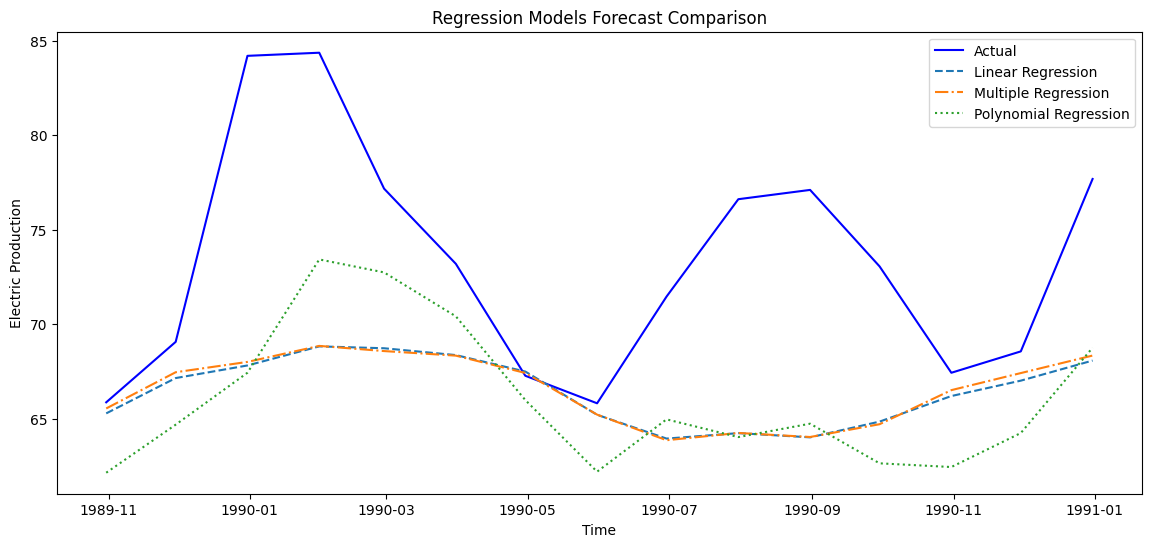

In [ ]:
# Plot Linear, Multiple, and Polynomial Regression predictions
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np # Import numpy for isfinite


# Regenerate data and predictions for Linear Regression
X_lin = merged[['Temperature']]
y_lin = merged['Electric']
# Drop rows with missing values in X_lin or y_lin before splitting
X_y_lin = pd.concat([X_lin, y_lin], axis=1).dropna()
X_lin = X_y_lin[['Temperature']]
y_lin = X_y_lin['Electric']
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_lin, y_lin, test_size=0.2, shuffle=False)
lin_reg = LinearRegression()
lin_reg.fit(X_train_lin, y_train_lin)
y_pred_lin = lin_reg.predict(X_test_lin)


# Regenerate data and predictions for Multiple Regression (using Temperature and Beer as features)
X_multi = merged[['Temperature','Beer']]
y_multi = merged['Electric']
# Drop rows with missing values in X_multi or y_multi before splitting
X_y_multi = pd.concat([X_multi, y_multi], axis=1).dropna()
X_multi = X_y_multi[['Temperature','Beer']]
y_multi = X_y_multi['Electric']
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, shuffle=False)
multi_reg = LinearRegression()
multi_reg.fit(X_train_multi, y_train_multi) # Use y_train_multi for fitting
y_pred_multi = multi_reg.predict(X_test_multi)


# Regenerate data and predictions for Polynomial Regression (using Temperature as feature)
X_poly = merged[['Temperature']]
y_poly = merged['Electric']
# Drop rows with missing values in X_poly or y_poly before splitting
X_y_poly = pd.concat([X_poly, y_poly], axis=1).dropna()
X_poly = X_y_poly[['Temperature']]
y_poly = X_y_poly['Electric']
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, shuffle=False)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train_poly)
X_poly_test = poly.transform(X_test_poly)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train_poly) # Use y_train_poly for fitting
y_pred_poly = poly_reg.predict(X_poly_test)


# Plot results using y_test_lin index (assuming all test sets cover the same time period)
plt.figure(figsize=(14,6))
plt.plot(y_test_lin.index, y_test_lin, label='Actual', color='blue')
plt.plot(y_test_lin.index, y_pred_lin, label='Linear Regression', linestyle='--')
plt.plot(y_test_lin.index, y_pred_multi, label='Multiple Regression', linestyle='-.')
plt.plot(y_test_lin.index, y_pred_poly, label='Polynomial Regression', linestyle=':')
plt.title("Regression Models Forecast Comparison")
plt.xlabel("Time")
plt.ylabel("Electric Production")
plt.legend()
plt.show()

Ensemble Methods Comparison

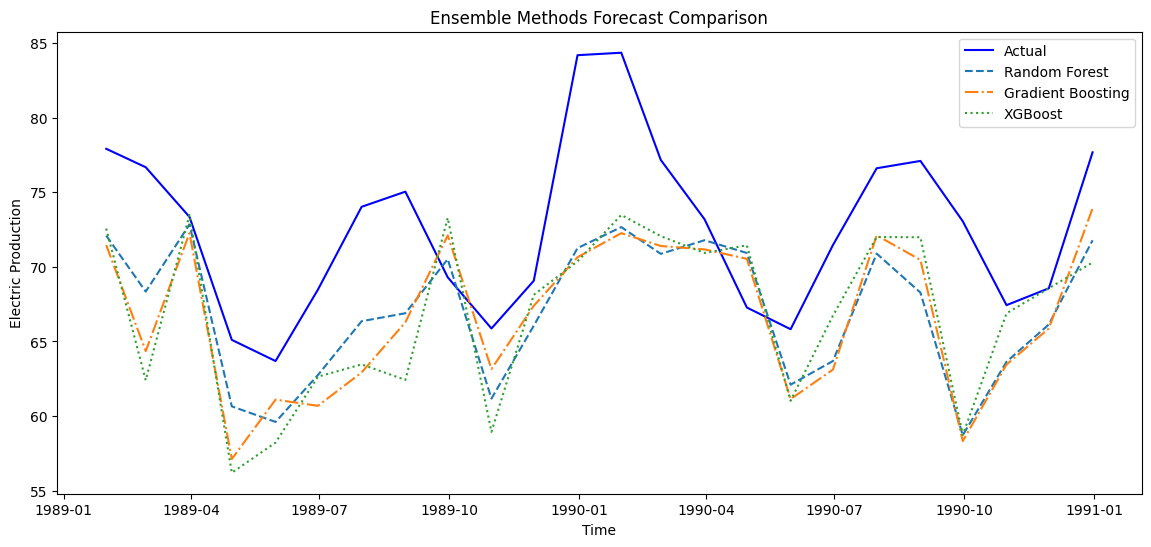

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Re-run split for one Ensemble model to get y_test with index for plotting
# Using features from the successful Random Forest run (Temperature and Beer)
X_rf = merged[['Temperature','Beer']].dropna()
y_rf = merged['Electric'].loc[X_rf.index]
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, shuffle=False)


plt.figure(figsize=(14,6))
plt.plot(y_test_rf.index, y_test_rf, label='Actual', color='blue')
plt.plot(y_test_rf.index, y_pred_rf, label='Random Forest', linestyle='--')
plt.plot(y_test_rf.index, y_pred_gb, label='Gradient Boosting', linestyle='-.')
plt.plot(y_test_rf.index, y_pred_xgb, label='XGBoost', linestyle=':')
plt.title("Ensemble Methods Forecast Comparison")
plt.xlabel("Time")
plt.ylabel("Electric Production")
plt.legend()
plt.show()

## 4.3 Interpretation of Findings

Temperature and Electricity are Friends

When the temperature changes, it can make people use more or less electricity. For example, really hot or really cold days might make more electricity get used for heating or cooling.

Our models (like Linear Regression and Decision Trees) help us see how much electricity changes when the temperature changes.

Adding More Clues Makes Predictions Better

When we also look at beer and shampoo sales (how much people buy), we get a better idea of how electricity usage works. This is like solving a puzzle with more pieces — it helps our predictions become more accurate.

Different Models Tell Different Stories

Decision Trees show rules, like “if temperature is above 25°C, electricity is high.”

Random Forest and XGBoost combine many little models to make smarter guesses.

Polynomial Regression shows that electricity doesn’t always change in a straight line — sometimes the relationship curves up or down.

Patterns and Groups

Clustering (K-Means, DBSCAN) groups days that are similar, like all hot days with high electricity, so we can spot patterns.

Smart Computers Can Learn Over Time

LSTM and other neural networks can remember past patterns. They see if what happened last month or last year affects electricity now.

Overall Finding

Temperature affects electricity, which can also influence how much people buy (beer/shampoo).

Using all the data together helps us make better guesses about the future for energy use and business decisions.

Basically, it’s like saying:
"We looked at how the weather, energy, and what people buy all play together. By using different smart tools, we can see patterns, make predictions, and help businesses plan better."

## 4.4 Business / Investment Implications

Business / Investment Implications (Kid-Friendly)

Energy Companies Can Plan Better

By knowing how temperature affects electricity use, power companies can make just the right amount of electricity — not too much, not too little.

This helps avoid wasting money and prevents blackouts.

Stores Can Stock Smarter

If we know how temperature and electricity use affect what people buy (like beer and shampoo), shops can have enough products when people need them.

This means fewer empty shelves and happier customers.

Investors Can Make Smarter Decisions

People who invest money in energy or consumer companies can see which businesses are sensitive to weather or electricity use.

They can plan to invest in companies that are likely to do well even when the weather changes.

Everyone Saves Money and Resources

Predicting patterns across energy, climate, and demand helps plan better, save energy, and reduce waste.

Big Picture

Using all the data together is like having a crystal ball — it helps companies and investors guess the future more accurately and make smarter choices.

Basically, it says:
"By studying weather, electricity, and buying patterns, businesses can plan better, save money, and make customers happy. Investors can also make smarter choices!"